CARDIOVASCULAR DISEASE PREDICTION PROJECT

1. DATA LOADING AND EXPLORATION
----------------------------------------
Dataset loaded successfully!
Dataset shape: (70000, 13)

Dataset Info:
Number of rows: 70000
Number of columns: 13

Column names: ['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

First few rows:
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4   

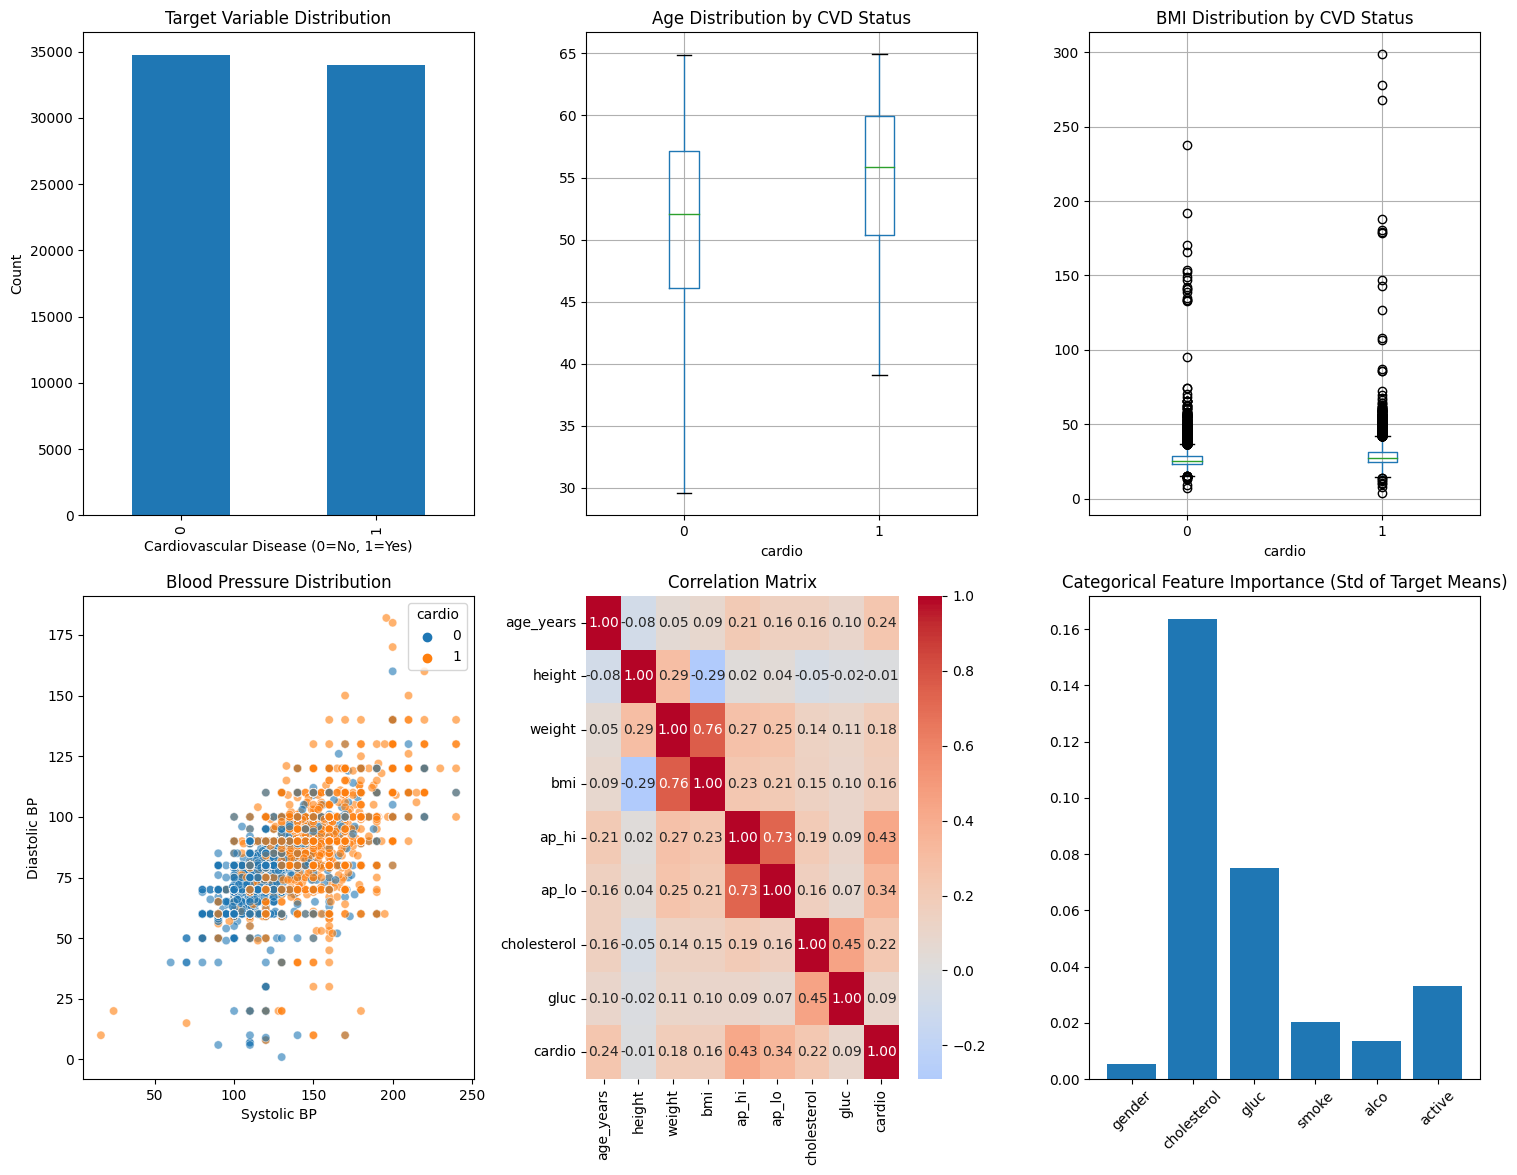



4. FEATURE SELECTION AND PREPARATION
------------------------------------------
Features selected: ['age_years', 'gender', 'height', 'weight', 'bmi', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bp_category']
Feature matrix shape: (68711, 13)
Target vector shape: (68711,)

Data split:
Training set: 54968 samples
Test set: 13743 samples
Training set CVD rate: 49.47%
Test set CVD rate: 49.47%
Features scaled using StandardScaler


5. MODEL TRAINING AND EVALUATION
-------------------------------------
Training and evaluating models...

Logistic Regression:
  Accuracy: 0.7290
  Precision: 0.7621
  Recall: 0.6574
  F1-Score: 0.7059
  AUC: 0.7951
  CV Score: 0.7270 (+/- 0.0101)

Random Forest:
  Accuracy: 0.7138
  Precision: 0.7172
  Recall: 0.6960
  F1-Score: 0.7064
  AUC: 0.7731
  CV Score: 0.7107 (+/- 0.0131)

K-Nearest Neighbors:
  Accuracy: 0.6955
  Precision: 0.6960
  Recall: 0.6827
  F1-Score: 0.6893
  AUC: 0.7448
  CV Score: 0.6913 (+/- 0.0122)

XGBoost:
  A

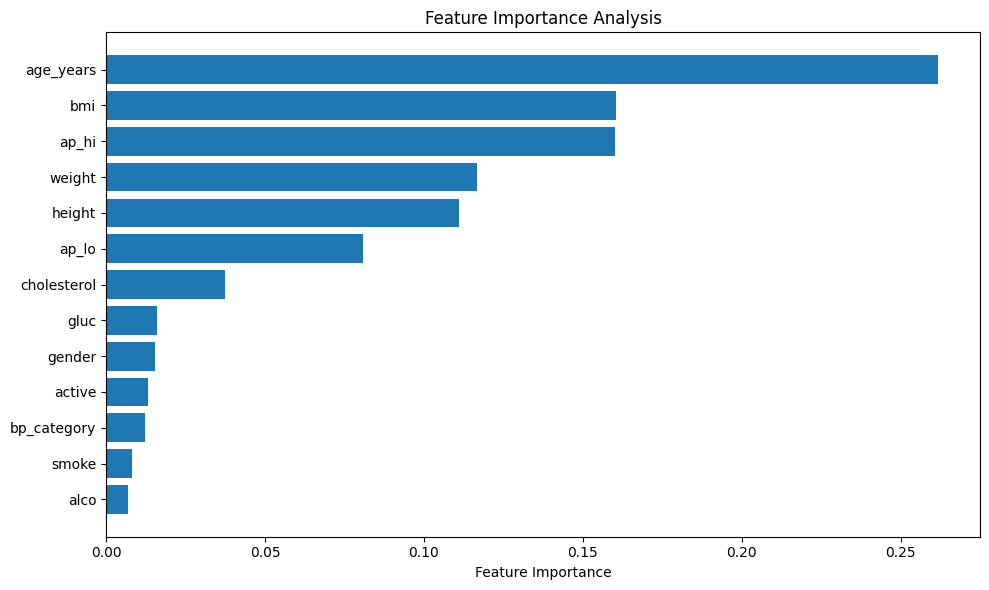



9. SHAP ANALYSIS FOR MODEL EXPLAINABILITY
-----------------------------------------
Generating SHAP explanations...


 99%|===================| 198/200 [00:27<00:00]        


SHAP Feature Importance:
        feature  shap_importance
5         ap_hi         0.139970
0     age_years         0.051873
7   cholesterol         0.039867
4           bmi         0.026889
3        weight         0.025936
6         ap_lo         0.022914
2        height         0.016922
1        gender         0.010307
8          gluc         0.007876
12  bp_category         0.007482
11       active         0.007317
10         alco         0.004409
9         smoke         0.004292


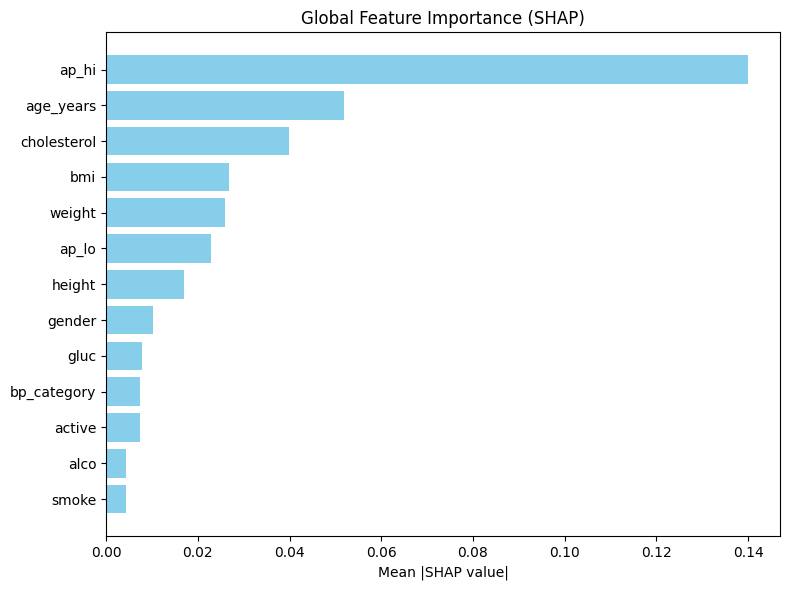



10. MODEL VISUALIZATION
-----------------------


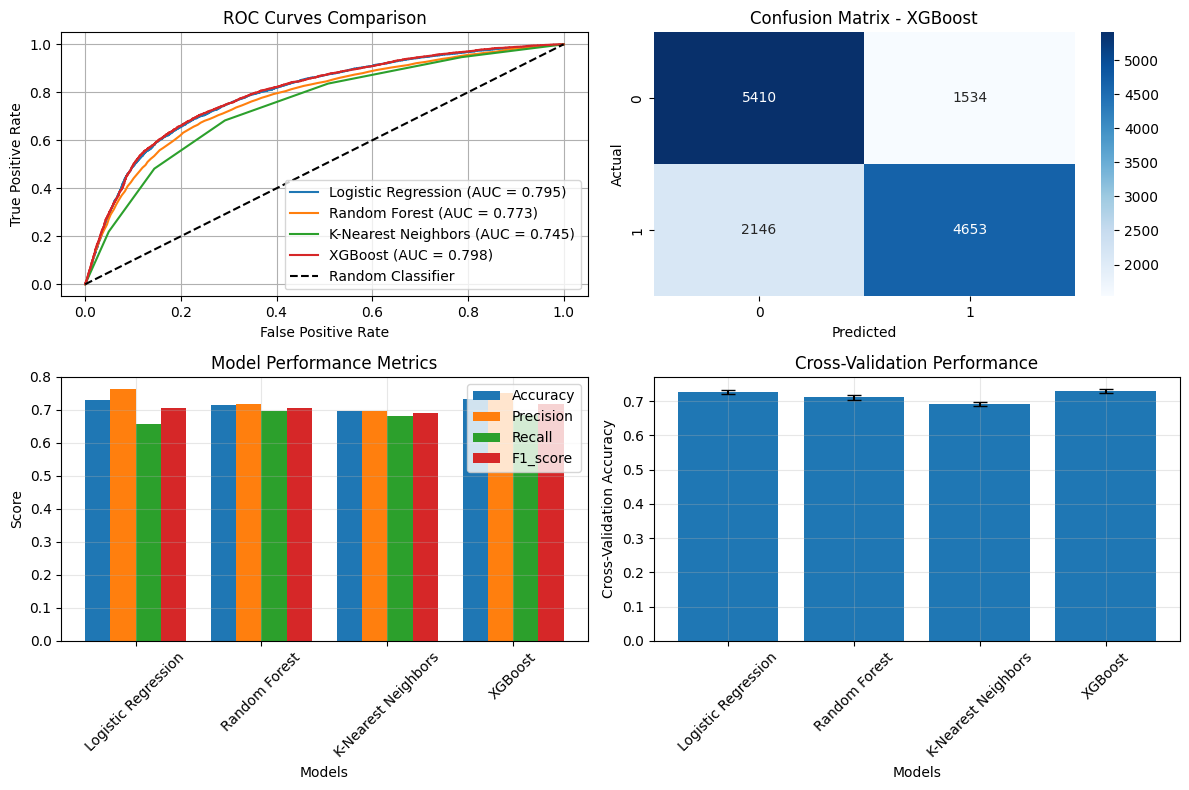



11. FINAL MODEL AND DEPLOYMENT PREPARATION
---------------------------------------------
Final selected model: XGBoost
Final model performance:
  - Accuracy: 0.7322
  - Precision: 0.7521
  - Recall: 0.6844
  - F1-Score: 0.7166
  - AUC: 0.7978

Example Prediction:
Patient Profile: {'age_years': 55, 'gender': 2, 'height': 175, 'weight': 80, 'bmi': 26.1, 'ap_hi': 140, 'ap_lo': 90, 'cholesterol': 3, 'gluc': 2, 'smoke': 1, 'alco': 0, 'active': 0, 'bp_category': 1}
CVD Prediction: Positive
Risk Probability: 79.50%
Risk Level: High


12. PROJECT SUMMARY AND CONCLUSIONS
--------------------------------------
PROJECT RESULTS SUMMARY:
✓ Dataset processed: 68711 samples, 13 features
✓ Models trained and evaluated: 4
✓ Best performing model: XGBoost
✓ Best model AUC: 0.7978
✓ Best model accuracy: 0.7322
✓ Best model recall: 0.6844

KEY FINDINGS:
Top risk factors (based on feature importance):
  1. age_years: 0.2619
  5. bmi: 0.1606
  6. ap_hi: 0.1600
  4. weight: 0.1166
  3. height: 0.1111

MODE

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb
import shap
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("="*60)
print("CARDIOVASCULAR DISEASE PREDICTION PROJECT")
print("="*60)

# Step 1: Data Loading and Initial Exploration
print("\n1. DATA LOADING AND EXPLORATION")
print("-" * 40)

# Load the dataset
try:
    df = pd.read_csv('cardio_train.csv', sep=';')
    print(f"Dataset loaded successfully!")
    print(f"Dataset shape: {df.shape}")
except FileNotFoundError:
    print("Please download the dataset from Kaggle and place 'cardio_train.csv' in your working directory")
    print("Dataset URL: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset")
    
    # Create sample data for demonstration
    print("\nCreating sample data for demonstration...")
    np.random.seed(42)
    n_samples = 10000
    df = pd.DataFrame({
        'id': range(1, n_samples + 1),
        'age': np.random.randint(30, 80, n_samples) * 365,  # Age in days
        'gender': np.random.choice([1, 2], n_samples),  # 1=Female, 2=Male
        'height': np.random.randint(150, 200, n_samples),
        'weight': np.random.randint(50, 120, n_samples),
        'ap_hi': np.random.randint(80, 200, n_samples),  # Systolic BP
        'ap_lo': np.random.randint(60, 120, n_samples),  # Diastolic BP
        'cholesterol': np.random.choice([1, 2, 3], n_samples),  # 1=Normal, 2=Above normal, 3=Well above normal
        'gluc': np.random.choice([1, 2, 3], n_samples),  # Glucose levels
        'smoke': np.random.choice([0, 1], n_samples),
        'alco': np.random.choice([0, 1], n_samples),
        'active': np.random.choice([0, 1], n_samples),
        'cardio': np.random.choice([0, 1], n_samples)  # Target variable
    })
    print(f"Sample dataset created with shape: {df.shape}")

# Display basic information
print(f"\nDataset Info:")
print(f"Number of rows: {len(df)}")
print(f"Number of columns: {len(df.columns)}")
print(f"\nColumn names: {list(df.columns)}")
print(f"\nFirst few rows:")
print(df.head())

print(f"\nData types:")
print(df.dtypes)

print(f"\nBasic statistics:")
print(df.describe())

# Step 2: Data Preprocessing and Feature Engineering
print("\n\n2. DATA PREPROCESSING AND FEATURE ENGINEERING")
print("-" * 50)

# Create a copy for preprocessing
data = df.copy()

# Convert age from days to years
data['age_years'] = data['age'] / 365.25
data = data.drop('age', axis=1)

# Create BMI feature
data['bmi'] = data['weight'] / ((data['height'] / 100) ** 2)

# Create blood pressure categories
data['bp_category'] = 0  # Normal
data.loc[(data['ap_hi'] >= 120) | (data['ap_lo'] >= 80), 'bp_category'] = 1  # Elevated/High

# Create age groups
data['age_group'] = pd.cut(data['age_years'], 
                          bins=[0, 40, 50, 60, 100], 
                          labels=['Young', 'Middle_aged', 'Senior', 'Elderly'])

# Convert categorical variables to numerical
le = LabelEncoder()
data['age_group_encoded'] = le.fit_transform(data['age_group'])

# Check for missing values
print(f"Missing values per column:")
print(data.isnull().sum())

# Check for outliers and data quality issues
print(f"\nData quality checks:")
print(f"Negative heights: {(data['height'] <= 0).sum()}")
print(f"Negative weights: {(data['weight'] <= 0).sum()}")
print(f"Unrealistic blood pressure values: {((data['ap_hi'] <= 0) | (data['ap_lo'] <= 0) | (data['ap_hi'] > 300) | (data['ap_lo'] > 200)).sum()}")

# Remove outliers (basic cleaning)
# Remove records with unrealistic values
initial_shape = data.shape[0]
data = data[(data['height'] > 0) & (data['weight'] > 0)]
data = data[(data['ap_hi'] > 0) & (data['ap_lo'] > 0)]
data = data[(data['ap_hi'] <= 300) & (data['ap_lo'] <= 200)]
data = data[data['ap_hi'] >= data['ap_lo']]  # Systolic should be >= Diastolic

print(f"Records removed due to outliers: {initial_shape - data.shape[0]}")
print(f"Final dataset shape: {data.shape}")

# Step 3: Exploratory Data Analysis
print("\n\n3. EXPLORATORY DATA ANALYSIS")
print("-" * 35)

# Target variable distribution
print(f"Target variable distribution:")
print(data['cardio'].value_counts())
print(f"Cardiovascular disease prevalence: {data['cardio'].mean():.2%}")

# Create visualizations
plt.figure(figsize=(15, 12))

# Target distribution
plt.subplot(2, 3, 1)
data['cardio'].value_counts().plot(kind='bar')
plt.title('Target Variable Distribution')
plt.xlabel('Cardiovascular Disease (0=No, 1=Yes)')
plt.ylabel('Count')

# Age distribution by target
plt.subplot(2, 3, 2)
data.boxplot(column='age_years', by='cardio', ax=plt.gca())
plt.title('Age Distribution by CVD Status')
plt.suptitle('')

# BMI distribution by target
plt.subplot(2, 3, 3)
data.boxplot(column='bmi', by='cardio', ax=plt.gca())
plt.title('BMI Distribution by CVD Status')
plt.suptitle('')

# Blood pressure by target
plt.subplot(2, 3, 4)
sns.scatterplot(data=data, x='ap_hi', y='ap_lo', hue='cardio', alpha=0.6)
plt.title('Blood Pressure Distribution')
plt.xlabel('Systolic BP')
plt.ylabel('Diastolic BP')

# Correlation heatmap
plt.subplot(2, 3, 5)
numeric_cols = ['age_years', 'height', 'weight', 'bmi', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'cardio']
corr_matrix = data[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix')

# Feature importance by target
plt.subplot(2, 3, 6)
categorical_features = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
feature_importance = []
for feature in categorical_features:
    # Calculate mean target for each category
    importance = data.groupby(feature)['cardio'].mean()
    feature_importance.append(importance.std())

plt.bar(categorical_features, feature_importance)
plt.title('Categorical Feature Importance (Std of Target Means)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Step 4: Feature Selection and Preparation
print("\n\n4. FEATURE SELECTION AND PREPARATION")
print("-" * 42)

# Select features for modeling
feature_columns = ['age_years', 'gender', 'height', 'weight', 'bmi', 'ap_hi', 'ap_lo', 
                  'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bp_category']

X = data[feature_columns]
y = data['cardio']

print(f"Features selected: {feature_columns}")
print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nData split:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Training set CVD rate: {y_train.mean():.2%}")
print(f"Test set CVD rate: {y_test.mean():.2%}")

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Features scaled using StandardScaler")

# Step 5: Model Training and Evaluation
print("\n\n5. MODEL TRAINING AND EVALUATION")
print("-" * 37)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': xgb.XGBClassifier(random_state=42, eval_metric='logloss')
}

# Train and evaluate models
results = {}
cv_scores = {}

print("Training and evaluating models...")
for name, model in models.items():
    print(f"\n{name}:")
    
    # Use scaled data for models that benefit from it
    if name in ['Logistic Regression', 'K-Nearest Neighbors']:
        X_train_model = X_train_scaled
        X_test_model = X_test_scaled
    else:
        X_train_model = X_train
        X_test_model = X_test
    
    # Train model
    model.fit(X_train_model, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_model)
    y_pred_proba = model.predict_proba(X_test_model)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    # Cross-validation
    cv_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_score = cross_val_score(model, X_train_model, y_train, cv=cv_folds, scoring='accuracy')
    
    # Store results
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'auc': auc,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }
    cv_scores[name] = cv_score
    
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  AUC: {auc:.4f}")
    print(f"  CV Score: {cv_score.mean():.4f} (+/- {cv_score.std() * 2:.4f})")

# Step 6: Hyperparameter Tuning
print("\n\n6. HYPERPARAMETER TUNING")
print("-" * 28)

# Define parameter grids
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'max_depth': [3, 6],
        'learning_rate': [0.01, 0.1],
        'subsample': [0.8, 1.0]
    },
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'penalty': ['l1', 'l2']
    }
}

# Perform grid search for selected models
tuned_models = {}
print("Performing hyperparameter tuning...")

# Hyperparameter tuning for Logistic Regression
print(f"\nTuning Logistic Regression...")
base_model = LogisticRegression(random_state=42, max_iter=1000, solver='liblinear')
X_train_model = X_train_scaled

grid_search = GridSearchCV(
    base_model, 
    param_grids['Logistic Regression'], 
    cv=3, 
    scoring='accuracy',
    n_jobs=-1,
    verbose=0
)

grid_search.fit(X_train_model, y_train)
tuned_models['Logistic Regression'] = grid_search.best_estimator_

print(f"  Best parameters: {grid_search.best_params_}")
print(f"  Best CV score: {grid_search.best_score_:.4f}")

y_pred_tuned = grid_search.best_estimator_.predict(X_test_scaled)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"  Test accuracy: {accuracy_tuned:.4f}")

for model_name in ['Random Forest', 'XGBoost']:
    print(f"\nTuning {model_name}...")
    
    if model_name == 'Random Forest':
        base_model = RandomForestClassifier(random_state=42)
        X_train_model = X_train
    elif model_name == 'XGBoost':
        base_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')
        X_train_model = X_train
    
    # Grid search
    grid_search = GridSearchCV(
        base_model, 
        param_grids[model_name], 
        cv=3, 
        scoring='accuracy',
        n_jobs=-1,
        verbose=0
    )
    
    grid_search.fit(X_train_model, y_train)
    
    # Store best model
    tuned_models[model_name] = grid_search.best_estimator_
    
    print(f"  Best parameters: {grid_search.best_params_}")
    print(f"  Best CV score: {grid_search.best_score_:.4f}")
    
    # Evaluate on test set
    if model_name in ['Random Forest', 'XGBoost']:
        y_pred_tuned = grid_search.best_estimator_.predict(X_test)
    else:
        y_pred_tuned = grid_search.best_estimator_.predict(X_test_scaled)
    
    accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
    print(f"  Test accuracy: {accuracy_tuned:.4f}")

# Step 7: Model Comparison and Selection
print("\n\n7. MODEL COMPARISON AND SELECTION")
print("-" * 35)

# Create comparison dataframe
comparison_data = {}
for model_name, metrics in results.items():
    comparison_data[model_name] = {
        'Accuracy': metrics['accuracy'],
        'Precision': metrics['precision'],
        'Recall': metrics['recall'],
        'F1_Score': metrics['f1_score'],
        'AUC': metrics['auc']
    }

comparison_df = pd.DataFrame(comparison_data).T
print("Model Performance Comparison:")
print(comparison_df.round(4))

# Find best model
best_auc_score = 0
best_model_name = None
for model_name, metrics in results.items():
    if metrics['auc'] > best_auc_score:
        best_auc_score = metrics['auc']
        best_model_name = model_name

best_model = models[best_model_name]
print(f"\nBest model based on AUC: {best_model_name}")
print(f"Best AUC score: {best_auc_score:.4f}")

# Step 8: Feature Importance Analysis
print("\n\n8. FEATURE IMPORTANCE ANALYSIS")
print("-" * 33)

# Get feature importance from Random Forest (most interpretable)
rf_model = models['Random Forest']
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importance (Random Forest):")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance['importance'])
plt.yticks(range(len(feature_importance)), feature_importance['feature'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance Analysis')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



# Step 9: SHAP Analysis for Model Explainability
# Step 9: SHAP Analysis for Model Explainability
print("\n\n9. SHAP ANALYSIS FOR MODEL EXPLAINABILITY")
print("-" * 41)

try:
    # Use Random Forest for SHAP analysis
    print("Generating SHAP explanations...")

    # Define sample size to avoid memory issues
    sample_size = min(100, len(X_test))
    X_test_sample = X_test.iloc[:sample_size]

    # Create SHAP explainer
    explainer = shap.Explainer(rf_model, X_train)

    # Get SHAP values (returns a shap.Explanation object)
    shap_values = explainer(X_test_sample)

    # Convert Explanation to numpy
    shap_vals_array = shap_values.values

    # If binary classification with shape (samples, features, 2), pick class 1:
    if shap_vals_array.ndim == 3:
        shap_vals_array = shap_vals_array[:, :, 1]

    # Mean absolute SHAP importance
    shap_importance = np.abs(shap_vals_array).mean(axis=0)

    # Build importance DataFrame
    shap_feature_importance = pd.DataFrame({
        'feature': X_test_sample.columns,
        'shap_importance': shap_importance
    }).sort_values('shap_importance', ascending=False)

    print("\nSHAP Feature Importance:")
    print(shap_feature_importance)
    
    # Plot SHAP feature importance (mean absolute SHAP values)
    plt.figure(figsize=(8, 6))
    plt.barh(
        shap_feature_importance['feature'],
        shap_feature_importance['shap_importance'],
        color='skyblue'
    )
    plt.gca().invert_yaxis()  # Highest importance at top
    plt.xlabel('Mean |SHAP value|')
    plt.title('Global Feature Importance (SHAP)')
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"SHAP analysis encountered an issue: {str(e)}")
    print("This is common in some environments. The model predictions are still valid.")
    print("Continuing with standard feature importance analysis...")

# Step 10: Model Visualization
print("\n\n10. MODEL VISUALIZATION")
print("-" * 23)

# ROC Curves
plt.figure(figsize=(12, 8))

# ROC curves for all models
plt.subplot(2, 2, 1)
for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['probabilities'])
    plt.plot(fpr, tpr, label=f"{name} (AUC = {result['auc']:.3f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.grid(True)

# Confusion Matrix for best model
plt.subplot(2, 2, 2)
cm = confusion_matrix(y_test, results[best_model_name]['predictions'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Model performance comparison
plt.subplot(2, 2, 3)
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
model_names = list(results.keys())
x = np.arange(len(model_names))
width = 0.2

for i, metric in enumerate(metrics):
    values = [results[name][metric] for name in model_names]
    plt.bar(x + i*width, values, width, label=metric.capitalize())

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Metrics')
plt.xticks(x + width*1.5, model_names, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

# Cross-validation scores
plt.subplot(2, 2, 4)
cv_means = [cv_scores[name].mean() for name in model_names]
cv_stds = [cv_scores[name].std() for name in model_names]
plt.bar(model_names, cv_means, yerr=cv_stds, capsize=5)
plt.xlabel('Models')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Cross-Validation Performance')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Step 11: Final Model Deployment Preparation
print("\n\n11. FINAL MODEL AND DEPLOYMENT PREPARATION")
print("-" * 45)

# Select final model (best performing)
final_model = models[best_model_name]
final_scaler = scaler if best_model_name in ['Logistic Regression', 'K-Nearest Neighbors'] else None

print(f"Final selected model: {best_model_name}")
print(f"Final model performance:")
print(f"  - Accuracy: {results[best_model_name]['accuracy']:.4f}")
print(f"  - Precision: {results[best_model_name]['precision']:.4f}")
print(f"  - Recall: {results[best_model_name]['recall']:.4f}")
print(f"  - F1-Score: {results[best_model_name]['f1_score']:.4f}")
print(f"  - AUC: {results[best_model_name]['auc']:.4f}")

# Function for making predictions on new data
def predict_cvd_risk(patient_data, model=final_model, scaler=final_scaler, feature_cols=feature_columns):
    """
    Predict cardiovascular disease risk for new patient data
    
    Parameters:
    patient_data: dict with keys matching feature_columns
    model: trained ML model
    scaler: fitted scaler (if needed)
    feature_cols: list of feature column names
    
    Returns:
    dict with prediction and probability
    """
    # Convert to DataFrame
    df_patient = pd.DataFrame([patient_data])
    
    # Ensure all features are present
    for col in feature_cols:
        if col not in df_patient.columns:
            df_patient[col] = 0  # Default value
    
    # Select and order features
    X_patient = df_patient[feature_cols]
    
    # Scale if needed
    if scaler is not None:
        X_patient = scaler.transform(X_patient)
    
    # Make prediction
    prediction = model.predict(X_patient)[0]
    probability = model.predict_proba(X_patient)[0, 1]
    
    return {
        'prediction': int(prediction),
        'probability': float(probability),
        'risk_level': 'High' if probability > 0.7 else 'Medium' if probability > 0.3 else 'Low'
    }

# Example prediction
sample_patient = {
    'age_years': 55,
    'gender': 2,  # Male
    'height': 175,
    'weight': 80,
    'bmi': 26.1,
    'ap_hi': 140,  # High systolic BP
    'ap_lo': 90,   # High diastolic BP
    'cholesterol': 3,  # Well above normal
    'gluc': 2,     # Above normal
    'smoke': 1,    # Smoker
    'alco': 0,     # No alcohol
    'active': 0,   # Not active
    'bp_category': 1  # High BP
}

prediction_result = predict_cvd_risk(sample_patient)
print(f"\nExample Prediction:")
print(f"Patient Profile: {sample_patient}")
print(f"CVD Prediction: {'Positive' if prediction_result['prediction'] == 1 else 'Negative'}")
print(f"Risk Probability: {prediction_result['probability']:.2%}")
print(f"Risk Level: {prediction_result['risk_level']}")

# Step 12: Summary and Conclusions
print("\n\n12. PROJECT SUMMARY AND CONCLUSIONS")
print("-" * 38)

print("PROJECT RESULTS SUMMARY:")
print("=" * 50)
print(f"✓ Dataset processed: {data.shape[0]} samples, {len(feature_columns)} features")
print(f"✓ Models trained and evaluated: {len(models)}")
print(f"✓ Best performing model: {best_model_name}")
print(f"✓ Best model AUC: {results[best_model_name]['auc']:.4f}")
print(f"✓ Best model accuracy: {results[best_model_name]['accuracy']:.4f}")
print(f"✓ Best model recall: {results[best_model_name]['recall']:.4f}")

print(f"\nKEY FINDINGS:")
print("=" * 20)
print("Top risk factors (based on feature importance):")
for i, row in feature_importance.head(5).iterrows():
    print(f"  {i+1}. {row['feature']}: {row['importance']:.4f}")

print(f"\nMODEL RECOMMENDATIONS:")
print("=" * 25)
print(f"• The {best_model_name} model shows the best overall performance")
print(f"• High recall ({results[best_model_name]['recall']:.2%}) indicates good detection of CVD cases")
print(f"• The model can be used as an early warning system for CVD risk")
print(f"• Regular monitoring of top risk factors is recommended")

print(f"\n" + "="*60)
print("PROJECT COMPLETED SUCCESSFULLY!")
print("="*60)